테스트 하려면 fruits_300.npy가 필요함 자료실에 있음

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = np.load('fruits_300.npy')

In [49]:
data.shape

(300, 100, 100)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
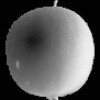

In [50]:
data[0,:,:]

In [51]:
data[0,50,:]

array([  5,   1,   1,   3,   2,  45,  84,  78,  76,  74,  76,  75,  74,
        75,  72,  67,  65,  65,  64,  63,  62,  60,  59,  62,  58,  55,
        54,  54,  53,  52,  50,  49,  51,  52,  53,  53,  54,  56,  59,
        62,  65,  67,  71,  74,  76,  79,  83,  86,  90,  94,  97,  99,
       102, 105, 108, 112, 115, 120, 124, 127, 133, 138, 143, 149, 155,
       156, 157, 162, 170, 174, 175, 176, 181, 187, 194, 201, 204, 206,
       210, 216, 222, 225, 228, 232, 234, 236, 237, 237, 237, 235, 237,
       238, 234, 229, 114,   1,   1,   1,   1,   1], dtype=uint8)

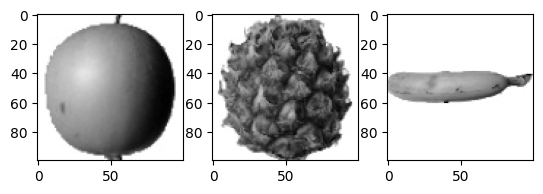

In [52]:
plt.subplot(1,3,1)
plt.imshow(data[0],cmap='gray_r')

plt.subplot(1,3,2)
plt.imshow(data[100],cmap='gray_r')

plt.subplot(1,3,3)
plt.imshow(data[200],cmap='gray_r')

plt.show()

In [53]:
apple = data[0:100].reshape(100,-1)
pineApple = data[100:200].reshape(100,-1)
banana = data[200:].reshape(100,-1)

In [54]:
apple.shape

(100, 10000)

In [55]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

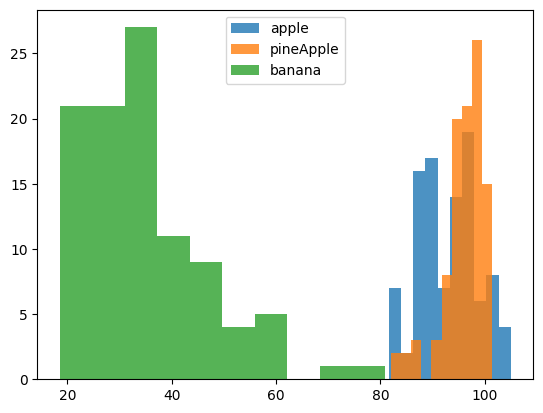

In [56]:
plt.hist(apple.mean(axis=1),label='apple',alpha=0.8)
plt.hist(pineApple.mean(axis=1),label='pineApple',alpha=0.8)
plt.hist(banana.mean(axis=1),label='banana',alpha=0.8)
plt.legend()
plt.show()

각 픽셀들의 평균

<BarContainer object of 10000 artists>

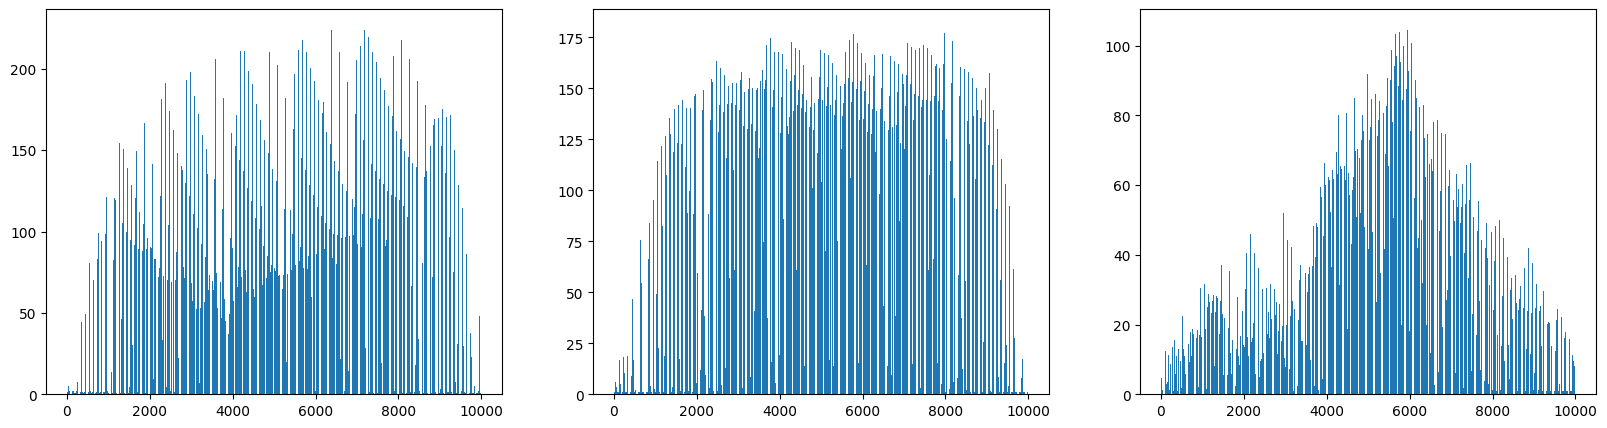

In [57]:
fig,axs =  plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(100*100), np.mean(apple,axis=0))
axs[1].bar(range(100*100), np.mean(pineApple,axis=0))
axs[2].bar(range(100*100), np.mean(banana,axis=0))

각 픽셀들의 평균으로 이미지를 구성

In [58]:
apple_mean =  np.mean(apple,axis=0)
pineapple_mean = np.mean(pineApple,axis=0)
banana_mean = np.mean(banana,axis=0)

In [59]:
apple_mean = apple_mean.reshape(100,-1)
pineapple_mean = pineapple_mean.reshape(100,-1)
banana_mean = banana_mean.reshape(100,-1)

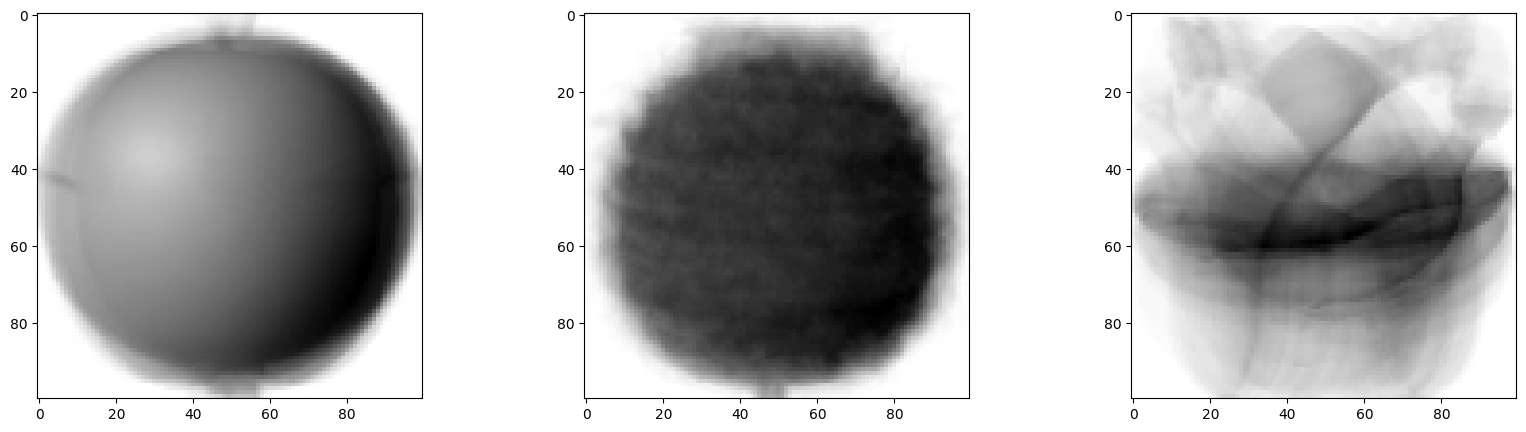

In [60]:
fig,axs =  plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

머신러닝 없이 이미지를 평균과 가장 가까운 이미지를 찾기
  - 사과의 픽셀별 평균(2x2)을 전체이미지와 각각 뺀다음에
  - 오차가 가장작은 순으로 100개 추출하면 된다.

In [61]:
# shape를 동일한지 확인
data.shape, apple_mean.shape

((300, 100, 100), (100, 100))

In [62]:
app_diff = np.abs(data - apple_mean)
app_diff.shape

(300, 100, 100)

In [63]:
app_diff =  np.mean(app_diff, axis=(1,2))
app_diff.shape

(300,)

In [64]:
app_index = np.argsort(app_diff)
app_index[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

In [ ]:
data[ app_index[:100] ]

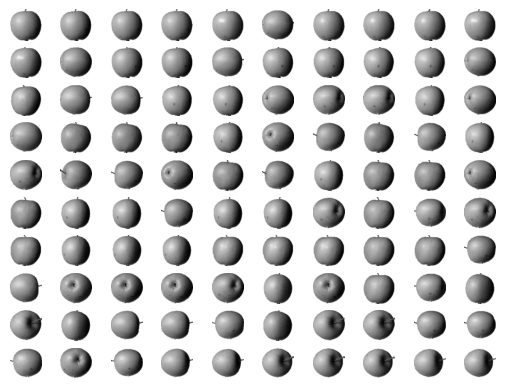

In [66]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow( data[ app_index[:100] ][i],cmap='gray_r'   )
  plt.axis('off')
plt.show()

In [70]:
np.mean(pineapple_mean), np.mean(banana_mean)

(96.260623, 34.597277)

44.76820572666665


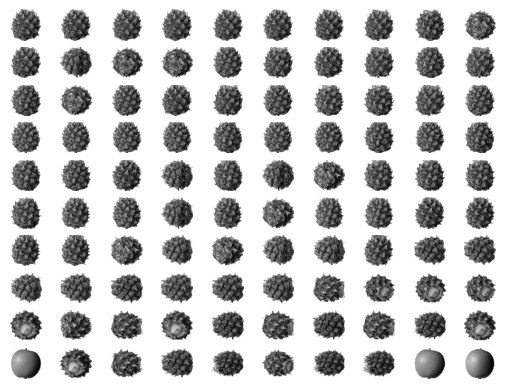

In [73]:
# 각픽셀의 평균값으로 오리지널 이미지와 오차를 구해서 가장 가까운 이미지를 찾는다
pixcel_mean = np.abs(data- pineapple_mean)
pixcel_mean = np.mean(pixcel_mean, axis=(1,2) )
mean_index = np.argsort(pixcel_mean)
predict_data = data[mean_index][:100]

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow( predict_data[i],cmap='gray_r'   )
  plt.axis('off')
plt.show()

56.33039988


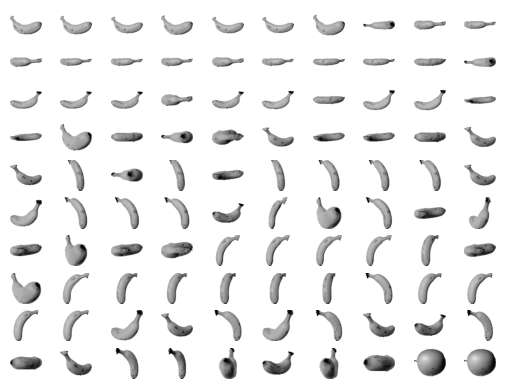

In [74]:
# 각픽셀의 평균값으로 오리지널 이미지와 오차를 구해서 가장 가까운 이미지를 찾는다
pixcel_mean = np.abs(data- banana_mean)
pixcel_mean = np.mean(pixcel_mean, axis=(1,2) )
mean_index = np.argsort(pixcel_mean)
predict_data = data[mean_index][:100]

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow( predict_data[i],cmap='gray_r'   )
  plt.axis('off')
plt.show()